In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import csv

/home/devops/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/devops/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/devops/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/devops/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']


In [28]:
name='https://raw.githubusercontent.com/avhadutgadhave/MLOP-s-POC-AWS/master/iris.csv'
data = pd.read_csv(name, names=CSV_COLUMN_NAMES)

In [41]:
data['Species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

In [42]:
df = pd.DataFrame(data) 
fun=df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']] 

cls=df[['Species']]
cls

,Species
0,versicolor
1,versicolor
2,setosa
3,virginica
4,setosa
...,...
145,virginica
146,setosa
147,setosa
148,setosa


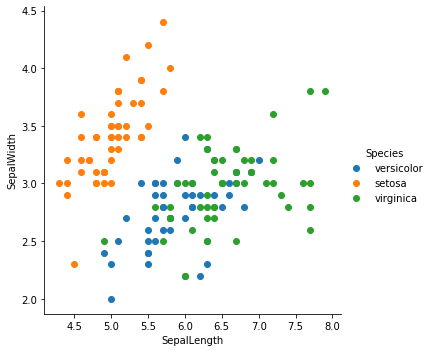

In [43]:
sns.FacetGrid(data,hue='Species',size=5).map(plt.scatter,'SepalLength','SepalWidth').add_legend()

In [51]:

X_train, X_test, y_train, y_test = train_test_split(fun, cls, test_size=0.20)

In [52]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
X_test

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,4.8,3.0,1.4,0.1
1,6.4,2.8,5.6,2.2
2,6.7,3.0,5.0,1.7
3,7.7,3.8,6.7,2.2
4,6.8,2.8,4.8,1.4
5,7.7,2.6,6.9,2.3
6,4.9,3.1,1.5,0.1
7,5.7,2.9,4.2,1.3
8,6.7,3.1,4.7,1.5
9,5.6,2.8,4.9,2.0


In [46]:
model=svm.SVC(kernel='linear')

In [47]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [48]:
def input_evaluation_set():
    features = {'SepalLength': np.array([6.4, 5.0]),
                'SepalWidth':  np.array([2.8, 2.3]),
                'PetalLength': np.array([5.6, 3.3]),
                'PetalWidth':  np.array([2.2, 1.0])}
    labels = np.array([2, 1])
    return features, labels

In [17]:
def input_fn(features, labels, training=True, batch_size=256):
    """An input function for training or evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)


In [18]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in data.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))


In [19]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
     hidden_units=[50, 50, 50],
    n_classes=3)

warnings.simplefilter('ignore')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp4mqacn2e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8a30f772e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [20]:
# Train the Model.
classifier.train(
    input_fn=lambda: input_fn(X_train, y_train, training=True),
    steps=5000)


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.cast` instead.


ValueError: Labels dtype should be integer. Instead got <dtype: 'string'>.

In [ ]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(X_test,y_test, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


In [24]:
# Generate predictions from the model
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.4, 5.3, 6.3],
    'SepalWidth': [3.7, 3.3, 3.3],
    'PetalLength': [1.8, 4.4, 5.3],
    'PetalWidth': [0.3, 1.3, 2.3],
}


In [25]:
def input_fn(features, batch_size=256):
    """An input function for prediction."""
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)


In [26]:
predictions = classifier.predict(
    input_fn=lambda: input_fn(predict_x))

In [27]:
for pred_dict, expec in zip(predictions, expected):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%), expected "{}"'.format(
        SPECIES[class_id], 100 * probability, expec))

    
    


INFO:tensorflow:Could not find trained model in model_dir: /tmp/tmp4mqacn2e, running initialization to predict.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Virginica" (37.4%), expected "Setosa"
Prediction is "Virginica" (37.2%), expected "Versicolor"
Prediction is "Versicolor" (34.6%), expected "Virginica"
